In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os


In [42]:
plt.rc('image', cmap='gray')

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving Training.zip to Training.zip


In [4]:
!unzip Training.zip

Archive:  Training.zip
   creating: Training/
 extracting: Training/001.tif        
 extracting: Training/017.tif        
 extracting: Training/043.tif        
 extracting: Training/044.tif        
 extracting: Training/055.tif        
 extracting: Training/067.tif        
 extracting: Training/070.tif        
 extracting: Training/078.tif        
 extracting: Training/090.tif        
 extracting: Training/091.tif        
 extracting: Training/098.tif        
 extracting: Training/103.tif        
 extracting: Training/107.tif        
 extracting: Training/108.tif        
 extracting: Training/125.tif        
 extracting: Training/134.tif        
 extracting: Training/144.tif        
 extracting: Training/145.tif        
 extracting: Training/146.tif        
 extracting: Training/147.tif        
 extracting: Training/150.tif        
 extracting: Training/152.tif        
 extracting: Training/156.tif        
 extracting: Training/158.tif        
 extracting: Training/162.tif        
 ext

In [43]:
path = './Training/'
img_names = os.listdir(path)
img_names = sorted(img_names)
image_names = ['./Training/' + name for name in img_names]
image_names = sorted(image_names)

In [68]:
img_names

['001.tif',
 '017.tif',
 '043.tif',
 '044.tif',
 '055.tif',
 '067.tif',
 '070.tif',
 '078.tif',
 '090.tif',
 '091.tif',
 '098.tif',
 '103.tif',
 '107.tif',
 '108.tif',
 '125.tif',
 '134.tif',
 '144.tif',
 '145.tif',
 '146.tif',
 '147.tif',
 '150.tif',
 '152.tif',
 '156.tif',
 '158.tif',
 '162.tif',
 '165.tif',
 '168.tif',
 '174.tif',
 '175.tif',
 '177.tif',
 '182.tif',
 '184.tif',
 '185.tif',
 '187.tif',
 '195.tif',
 '196.tif',
 '201.tif',
 '209.tif',
 '217.tif',
 '225.tif',
 '226.tif',
 '230.tif',
 '231.tif',
 '235.tif',
 '239.tif',
 '240.tif',
 '247.tif',
 '248.tif',
 '251.tif',
 '252.tif',
 '254.tif',
 '265.tif',
 '266.tif',
 '267.tif',
 '271.tif',
 '272.tif',
 '274.tif',
 '277.tif',
 '280.tif',
 '281.tif',
 '284.tif',
 '286.tif',
 '288.tif',
 '289.tif',
 '292.tif',
 '295.tif',
 '300.tif']

In [44]:
image_names

['./Training/001.tif',
 './Training/017.tif',
 './Training/043.tif',
 './Training/044.tif',
 './Training/055.tif',
 './Training/067.tif',
 './Training/070.tif',
 './Training/078.tif',
 './Training/090.tif',
 './Training/091.tif',
 './Training/098.tif',
 './Training/103.tif',
 './Training/107.tif',
 './Training/108.tif',
 './Training/125.tif',
 './Training/134.tif',
 './Training/144.tif',
 './Training/145.tif',
 './Training/146.tif',
 './Training/147.tif',
 './Training/150.tif',
 './Training/152.tif',
 './Training/156.tif',
 './Training/158.tif',
 './Training/162.tif',
 './Training/165.tif',
 './Training/168.tif',
 './Training/174.tif',
 './Training/175.tif',
 './Training/177.tif',
 './Training/182.tif',
 './Training/184.tif',
 './Training/185.tif',
 './Training/187.tif',
 './Training/195.tif',
 './Training/196.tif',
 './Training/201.tif',
 './Training/209.tif',
 './Training/217.tif',
 './Training/225.tif',
 './Training/226.tif',
 './Training/230.tif',
 './Training/231.tif',
 './Trainin

In [45]:
def binarize(img, threshold):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, img = cv2.threshold(img, threshold, 1, cv2.THRESH_BINARY)
    return img

In [46]:
def triangle_area(point1, point2, point3):
    x1, y1, x2, y2, x3, y3 = point1[0], point1[1], point2[0], point2[1], point3[0], point3[1]
    return abs(0.5 * (((x2-x1)*(y3-y1))-((x3-x1)*(y2-y1))))

In [47]:
def angle(a, b):
  inner = np.inner(a, b)
  norms = np.linalg.norm(a) * np.linalg.norm(b)
  cos = inner / norms
  rad = np.arccos(np.clip(cos, -1.0, 1.0))
  return np.rad2deg(rad)

In [48]:
def get_key_angles(convexity_defects_points, cos_threshold):
    defect_vectors = convexity_defects_points[:, :2] - convexity_defects_points[:, None, 2]
    defect_vectors_norm = defect_vectors / np.sqrt((defect_vectors ** 2).sum(axis=2, keepdims=True))
    cos_values = (defect_vectors_norm[:, 0] * defect_vectors_norm[:, 1]).sum(axis=1)
    return cos_values > cos_threshold

In [49]:
def get_fingerline_points(convexity_defects, hand_contour, threshold, min_area, min_angle):
    convexity_defects_idx = convexity_defects[:, 0, :3]
    idx = get_key_angles(hand_contour[convexity_defects_idx, 0], threshold)
    key_convexity_defects = convexity_defects[idx]
    dists = key_convexity_defects[:, 0, 3]
    key_dist_idx = sorted(dists.argsort()[-4:])
    line_starts = hand_contour[key_convexity_defects[key_dist_idx, 0, 0], 0]
    line_ends = hand_contour[key_convexity_defects[key_dist_idx, 0, 1], 0]
    line_farpoints = hand_contour[key_convexity_defects[key_dist_idx, 0, 2], 0]
    pairwise = ((line_starts - line_ends[:, None]) ** 2).sum(axis=-1)
    start_idx = pairwise.min(axis=0).argmax()
    start = tuple(line_starts[start_idx])
    end_idx = pairwise.min(axis=1).argmax()
    end = tuple(line_ends[end_idx])
    intermediate_fingers = (np.vstack((line_starts[start_idx+1:], line_starts[:start_idx])) + np.vstack((line_ends[end_idx+1:], line_ends[:end_idx]))) / 2
    intermediate_joints = np.vstack((line_farpoints[start_idx:], line_farpoints[:start_idx]))
    area1 = triangle_area(start, intermediate_joints[0], intermediate_fingers[0])
    area2 = triangle_area(intermediate_fingers[0], intermediate_joints[1], intermediate_fingers[1])
    area3 = triangle_area(intermediate_fingers[1], intermediate_joints[2], intermediate_fingers[2])
    area4 = triangle_area(intermediate_fingers[2], intermediate_joints[3], end)
    angle1 = angle(start - intermediate_joints[0], intermediate_fingers[0] - intermediate_joints[0])
    angle2 = angle(intermediate_fingers[0] - intermediate_joints[1], intermediate_fingers[1] - intermediate_joints[1])
    angle3 = angle(intermediate_fingers[1] - intermediate_joints[2], intermediate_fingers[2] - intermediate_joints[2])
    angle4 = angle(intermediate_fingers[2] - intermediate_joints[3], end - intermediate_joints[3])
    ans = '1'
    if area1 < min_area or angle1 < min_angle:
        ans += '+'
    else:
        ans += '-'
    ans += '2'
    if area2 < min_area or angle2 < min_angle:
        ans += '+'
    else:
        ans += '-'
    ans += '3'
    if area3 < min_area or angle3 < min_angle:
        ans += '+'
    else:
        ans += '-'
    ans += '4'
    if area4 < min_area or angle4 < min_angle:
        ans += '+'
    else:
        ans += '-'
    ans += '5'
    fingerline_points = np.array([start, intermediate_joints[0], intermediate_fingers[0], intermediate_joints[1], intermediate_fingers[1], intermediate_joints[2], intermediate_fingers[2], intermediate_joints[3], end])
    return fingerline_points.astype(int), ans

In [50]:
def get_contours_and_fingerline(img, img_name, bin_threshold ,threshold, min_area, min_angle):
    img_binarized = binarize(img, bin_threshold)
    contours, hierarchy = cv2.findContours(img_binarized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    hand_contour = contours[np.argmax([len(contour) for contour in contours])]
    convex_hull = cv2.convexHull(hand_contour, clockwise=False)
    convex_hull_idx = cv2.convexHull(hand_contour, returnPoints=False)
    convexity_defects = cv2.convexityDefects(hand_contour, convex_hull_idx)
    f, ans = get_fingerline_points(convexity_defects, hand_contour, threshold, min_area, min_angle)
    with open('Results.txt', 'w') as fout:
        print(f'{ans}', file=fout)
        print(f'!,{img_name},T {f[0][0]} {f[0][1]},T {f[2][0]} {f[2][1]},T {f[4][0]} {f[4][1]},T {f[6][0]} {f[6][1]},T {f[8][0]} {f[8][1]},V {f[1][0]} {f[1][1]},V {f[3][0]} {f[3][1]},V {f[5][0]} {f[5][1]},V {f[7][0]} {f[7][1]},?', file=fout)
    return hand_contour, convex_hull, f, ans

In [51]:
def show_result(img, hand_contour=None, convex_hull=None, fingerline_points=None):
    if hand_contour is not None:
        cv2.drawContours(img, [hand_contour], 0, (255, 255, 0), 3)
    if convex_hull is not None:
        cv2.drawContours(img, [convex_hull], 0, (255, 0, 255), 3)
    if fingerline_points is not None:
        cv2.polylines(img, [fingerline_points.astype(np.int32).reshape(-1, 1, 2)], False, (0, 255, 0), 3)
        for point in fingerline_points:
            cv2.circle(img, tuple(point), 10, (0, 255, 255), -1)
    return img 

# Алгоритм и демонстрация работы

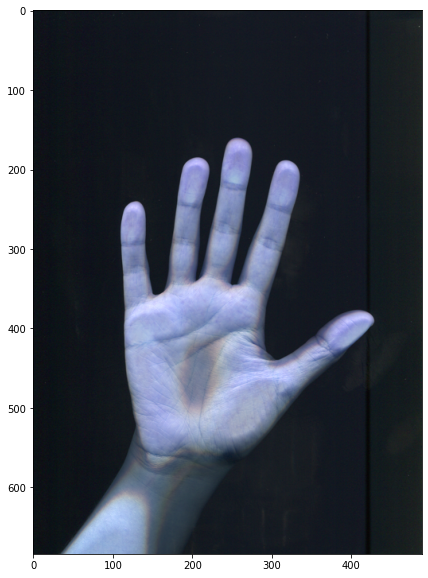

In [27]:
plt.figure(figsize=(15, 10))
img_start = cv2.imread(image_names[0])
plt.imshow(img_start)
plt.savefig('Source.jpg', format='jpg')

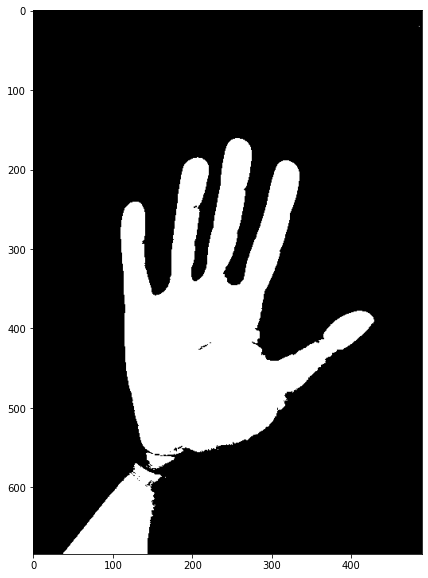

In [30]:
plt.figure(figsize=(15, 10))
img_start = cv2.imread(image_names[0])
img_test = binarize(img_start, 100)
plt.imshow(img_test)
plt.savefig('Binarization.jpg', format='jpg')

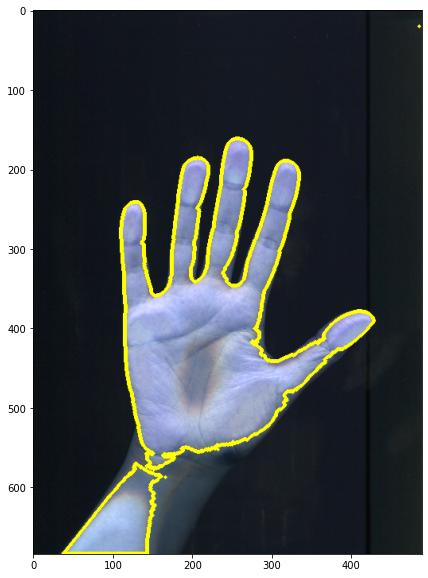

In [31]:
plt.figure(figsize=(15, 10))
contours, hierarchy = cv2.findContours(img_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    cv2.drawContours(img_start, [contour], 0, (255, 255, 0), 3)
plt.imshow(img_start)
plt.savefig('All_contours.jpg', format='jpg')

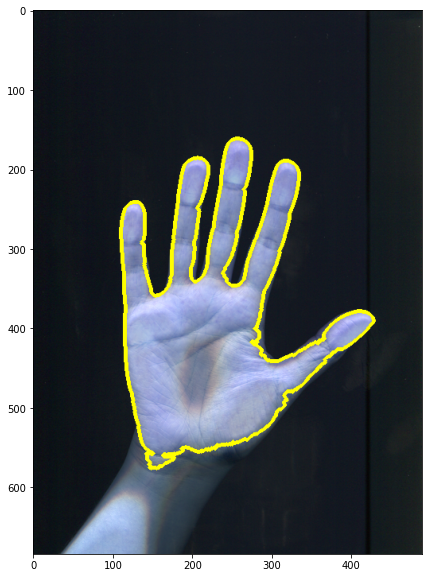

In [32]:
plt.figure(figsize=(15, 10))
img_start = cv2.imread(image_names[0])
img_test = binarize(img_start, 100)
contours, hierarchy = cv2.findContours(img_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
hand_contour = contours[np.argmax([len(contour) for contour in contours])]
cv2.drawContours(img_start, [hand_contour], 0, (255, 255, 0), 3)
plt.imshow(img_start)
plt.savefig('Hand_contour.jpg', format='jpg')

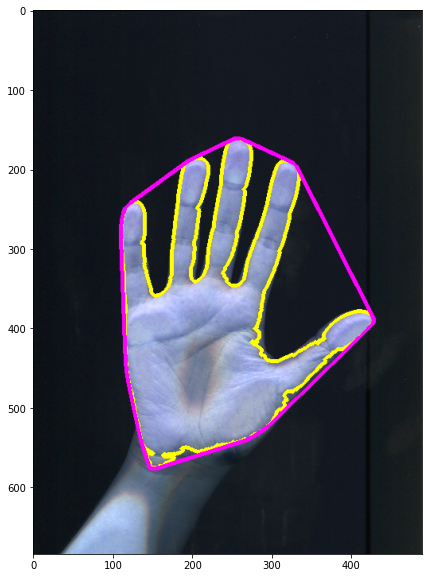

In [33]:
plt.figure(figsize=(15, 10))
convex_hull = cv2.convexHull(hand_contour, clockwise=False)
cv2.drawContours(img_start, [convex_hull], 0, (255, 0, 255), 3)
plt.imshow(img_start)
plt.savefig('Convex_hull.jpg', format='jpg')

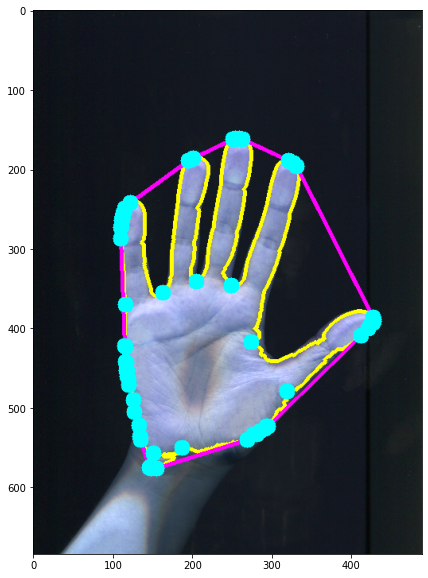

In [34]:
plt.figure(figsize=(15, 10))
convex_hull_idx = cv2.convexHull(hand_contour, returnPoints=False)
convexity_defects = cv2.convexityDefects(hand_contour, convex_hull_idx)
line_starts = hand_contour[convexity_defects[:, 0, 0], 0]
line_ends = hand_contour[convexity_defects[:, 0, 1], 0]
line_farpoints = hand_contour[convexity_defects[:, 0, 2], 0]
for point in line_starts:
    cv2.circle(img_start, tuple(point), 10, (0, 255, 255), -1)
for point in line_ends:
    cv2.circle(img_start, tuple(point), 10, (0, 255, 255), -1)
for point in line_farpoints:
    cv2.circle(img_start, tuple(point), 10, (0, 255, 255), -1)
plt.imshow(img_start)
plt.savefig('All_conv_defects.jpg', format='jpg')

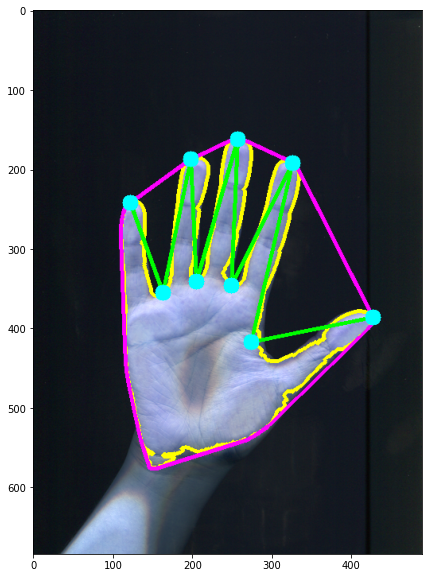

In [67]:
plt.figure(figsize=(15, 10))
img_start = cv2.imread(image_names[0])
hand_contour, convex_hull, fingerline_points, ans = get_contours_and_fingerline(img_start, '001.tif', bin_threshold=100, threshold=-0.5, min_area=3000, min_angle=18)
img_start = show_result(img_start, hand_contour, convex_hull, fingerline_points)
plt.imshow(img_start)
plt.savefig('All.jpg', format='jpg')

001.tif
1-2-3-4-5


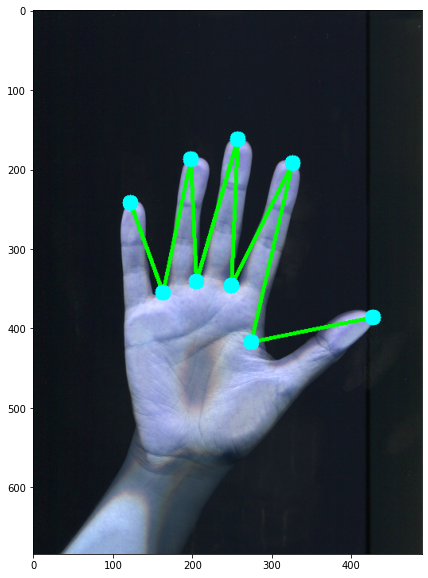

In [35]:
plt.figure(figsize=(15, 10))
#Можно задать имя изображения напрямую или по индексу в списке имен

#При задании имени по индексу из списка:
num = 0
img = cv2.imread(image_names[num])
hand_contour, convex_hull, fingerline_points, ans = get_contours_and_fingerline(img, img_names[num], bin_threshold=100, threshold=-0.5, min_area=3000, min_angle=18)

#При задании имени напрямую:
#name = '001.tif'
#fname = './Training/' + name
#img = cv2.imread(fname)
#hand_contour, convex_hull, fingerline_points, ans = get_contours_and_fingerline(img, name, bin_threshold=50, threshold=-0.5, min_area=3000, min_angle=18)

img = show_result(img, fingerline_points=fingerline_points)
plt.imshow(img)
plt.savefig('Result.jpg', format='jpg')
print(img_names[num])
print(ans)

In [36]:
!cat Results.txt

1-2-3-4-5
!,001.tif,T 427 386,T 326 192,T 257 162,T 198 187,T 122 242,V 274 417,V 249 346,V 205 341,V 163 355,?
